In [1]:
import cv2
import matplotlib.pyplot as plt
import data_reader
import numpy as np

## GTEX VS TCGA NORMAL TISSUE

In [2]:
DATA_SET_NAME = f"data_set_x20_100%_SPLIT"

In [3]:
n_splits = 10
X, Y, patch_ids = [], [], []

for SPLIT in range(n_splits):
    if SPLIT == n_splits-1: # For the final split for validation we take the firs one for test
        SPLIT_NAME = DATA_SET_NAME + f"{0}"
    else:
        SPLIT_NAME = DATA_SET_NAME + f"{SPLIT+1}" # Test set

    print("Reading split: ", SPLIT_NAME)
    x, y, _ , case_id = data_reader.read_lmdb(f"D:\data\WSI\patches\{SPLIT_NAME}")

    X.extend(x)
    Y.extend(y)
    patch_ids.extend(case_id)

Reading split:  data_set_x20_100%_SPLIT1
Read lmdb
8207
Reading split:  data_set_x20_100%_SPLIT2
Read lmdb
9777
Reading split:  data_set_x20_100%_SPLIT3
Read lmdb
9243
Reading split:  data_set_x20_100%_SPLIT4
Read lmdb
8730
Reading split:  data_set_x20_100%_SPLIT5
Read lmdb
8520
Reading split:  data_set_x20_100%_SPLIT6
Read lmdb
8464
Reading split:  data_set_x20_100%_SPLIT7
Read lmdb
8236
Reading split:  data_set_x20_100%_SPLIT8
Read lmdb
7714
Reading split:  data_set_x20_100%_SPLIT9
Read lmdb
9329
Reading split:  data_set_x20_100%_SPLIT0
Read lmdb
8209


c:\Users\Alejandro\anaconda3\envs\openslide\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Alejandro\anaconda3\envs\openslide\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Alejandro\AppData\Local\Temp\ipykernel_1544\1326411558.py:42: RuntimeWarning: invalid value encountered in true_divide
  ax[1].plot(gtex_hist[i]/gtex_count, color = col)


IndexError: invalid index to scalar variable.

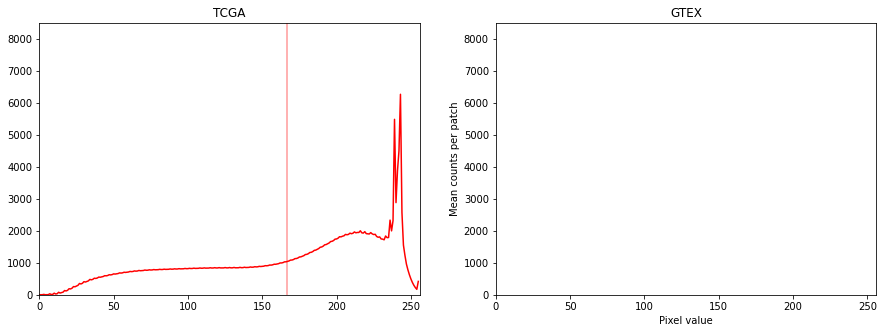

In [6]:
color = ('r','g','b')

tcga_hist = [np.zeros((256,1)),np.zeros((256,1)),np.zeros((256,1))]
gtex_hist = [np.zeros((256,1)),np.zeros((256,1)),np.zeros((256,1))]
mean_tcga, mean_gtex = [],[]
std_tcga, std_gtex = [],[]

for i, col in enumerate(color):
    tcga_count, gtex_count = 0, 0
    for x, y, case_id in zip(X, Y, patch_ids):
        if "TCGA" in case_id or "GTEX" in case_id:# and y[0]==1:
            tcga_hist[i] += cv2.calcHist([x],[i],None,[256],[0,256])
            tcga_count+=1
            mean_tcga.append(cv2.mean(x))
            std_tcga.append(cv2.meanStdDev(x)[1])
        elif "GTEX" in case_id:
            gtex_hist[i] += cv2.calcHist([x],[i],None,[256],[0,256])
            gtex_count+=1
            mean_gtex.append(cv2.mean(x))
            std_gtex.append(cv2.meanStdDev(x)[1])

mean_tcga, mean_gtex = np.mean(mean_tcga, axis=0), np.mean(mean_gtex, axis=0)
std_tcga, std_gtex = np.mean(std_tcga, axis=0), np.mean(std_gtex, axis=0)


fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].set_xlim([0,256])
ax[1].set_xlim([0,256])

ax[0].set_ylim([0,8500])
ax[1].set_ylim([0,8500])

plt.ylabel("Mean counts per patch")
plt.xlabel("Pixel value")

ax[0].set_title("TCGA")
ax[1].set_title("GTEX")

for i, col in enumerate(color):
    ax[0].plot(tcga_hist[i]/tcga_count, color = col)
    ax[1].plot(gtex_hist[i]/gtex_count, color = col)

    ax[0].axvline(mean_tcga[i], color=col, alpha=0.4, label=f"Mean {col}")
    ax[1].axvline(mean_gtex[i], color=col, alpha=0.4, label=f"Mean {col}")

ax[0].legend()
ax[1].legend()

fig.show()
fig.savefig(r"C:\Users\Alejandro\Desktop\heterogeneous-data\results\WSI\histo\GTEX_TCGA_all.pdf")

In [5]:
print(len(patch_ids))

86429


In [6]:
print(tcga_count)
print(gtex_count)

40206
45358


In [8]:
print("Mean TCGA: ", mean_tcga[:3], "Mean GTEX: ", mean_gtex[:3])
print("STD TCGA: ", std_tcga[:,0], "STD GTEX: ", std_gtex[:,0])


Mean TCGA:  [166.44544832 115.25740225 149.71458135]
STD TCGA:  [51.04418855 53.39864174 43.56392919]


In [2]:
DATA_SET_NAME = "tcia_data_set_SPLIT"

In [7]:
n_splits = 3
X, Y, patch_ids = [], [], []

for SPLIT in range(n_splits):
    if SPLIT == n_splits-1: # For the final split for validation we take the firs one for test
        SPLIT_NAME = DATA_SET_NAME + f"{0}"
    else:
        SPLIT_NAME = DATA_SET_NAME + f"{SPLIT+1}" # Test set

    print("Reading split: ", SPLIT_NAME)
    x, y, _ , case_id = data_reader.read_lmdb(f"D:\data\WSI\patches\{SPLIT_NAME}")

    X.extend(x)
    Y.extend(y)
    patch_ids.extend(case_id)

Reading split:  tcia_data_set_SPLIT1
Read lmdb
23065
Reading split:  tcia_data_set_SPLIT2
Read lmdb
20366
Reading split:  tcia_data_set_SPLIT0
Read lmdb
18709


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_21880\1536235111.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


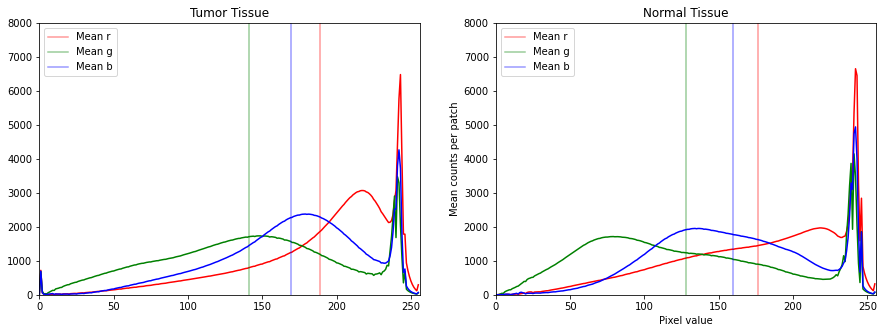

In [8]:
color = ('r','g','b')

tumor_hist = [np.zeros((256,1)),np.zeros((256,1)),np.zeros((256,1))]
normal_hist = [np.zeros((256,1)),np.zeros((256,1)),np.zeros((256,1))]
mean_tumor, mean_normal = [],[]
std_tumor, std_normal = [],[]

for i, col in enumerate(color):
    tumor_count, normal_count = 0, 0
    for x, y, case_id in zip(X, Y, patch_ids):
        if y[0]==0:
            tumor_hist[i] += cv2.calcHist([x],[i],None,[256],[0,256])
            tumor_count+=1
            mean_tumor.append(cv2.mean(x))
            std_tumor.append(cv2.meanStdDev(x)[1])
        else:
            normal_hist[i] += cv2.calcHist([x],[i],None,[256],[0,256])
            normal_count+=1
            mean_normal.append(cv2.mean(x))
            std_normal.append(cv2.meanStdDev(x)[1])

mean_tumor, mean_normal = np.mean(mean_tumor, axis=0), np.mean(mean_normal, axis=0)
std_tumor, std_normal = np.mean(std_tumor, axis=0), np.mean(std_normal, axis=0)


fig, ax = plt.subplots(1,2, figsize=(15, 5))

plt.ylabel("Mean counts per patch")
plt.xlabel("Pixel value")

ax[0].set_xlim([0,256])
ax[1].set_xlim([0,256])


ax[0].set_ylim([0,8000])
ax[1].set_ylim([0,8000])

ax[0].set_title("Tumor Tissue")
ax[1].set_title("Normal Tissue")

for i, col in enumerate(color): 
    ax[0].plot(tumor_hist[i]/tumor_count, color = col)
    ax[1].plot(normal_hist[i]/normal_count, color = col)
    
    ax[0].axvline(mean_tumor[i], color=col, alpha=0.4, label=f"Mean {col}")
    ax[1].axvline(mean_normal[i], color=col, alpha=0.4, label=f"Mean {col}")

ax[0].legend()
ax[1].legend()

fig.show()
fig.savefig(r"C:\Users\Alejandro\Desktop\heterogeneous-data\results\WSI\histo\TCIA_hist.pdf")

In [9]:
print("Mean normal: ", mean_normal[:3], "Mean tumor: ", mean_tumor[:3])
print("STD normal: ", std_normal[:,0], "STD tumor: ", std_tumor[:,0])


Mean normal:  [176.44822778 127.72976811 159.84794249] Mean tumor:  [189.17083621 141.3623687  169.59789148]
STD normal:  [43.65041758 48.41656806 38.64734617] STD tumor:  [39.69004373 45.74257224 36.19704   ]


## MHMC

In [12]:
n_splits = 10
X, Y, patch_ids = [], [], []

for SPLIT in range(n_splits):
    if SPLIT == n_splits-1: # For the final split for validation we take the firs one for test
        SPLIT_NAME = DATA_SET_NAME + f"{0}"
    else:
        SPLIT_NAME = DATA_SET_NAME + f"{SPLIT+1}" # Test set

    print("Reading split: ", SPLIT_NAME)

    split = open(f"C:\\Users\\Alejandro\\Desktop\\heterogeneous-data\\splits\\mhmc_testsplit{SPLIT}.txt", "r").read().split()
    path = "D:/data/WSI/MHMC/TMA"
    x, y, case_id = data_reader.read_mhmc(path, split)

    X.extend(x)
    Y.extend(y)
    patch_ids.extend(case_id)


Reading split:  train_256_tcia_data_set_SPLIT1
Read MHMC dataset
Reading split:  train_256_tcia_data_set_SPLIT2
Read MHMC dataset
Reading split:  train_256_tcia_data_set_SPLIT3
Read MHMC dataset
Reading split:  train_256_tcia_data_set_SPLIT4
Read MHMC dataset
Reading split:  train_256_tcia_data_set_SPLIT5
Read MHMC dataset
Reading split:  train_256_tcia_data_set_SPLIT6
Read MHMC dataset
Reading split:  train_256_tcia_data_set_SPLIT7
Read MHMC dataset
Reading split:  train_256_tcia_data_set_SPLIT8
Read MHMC dataset
Reading split:  train_256_tcia_data_set_SPLIT9
Read MHMC dataset
Reading split:  train_256_tcia_data_set_SPLIT0
Read MHMC dataset


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_21932\3645227292.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


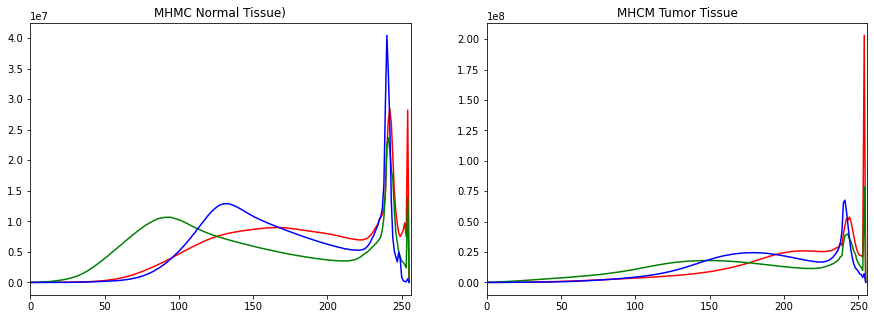

In [13]:
color = ('r','g','b')

normal_hist = [np.zeros((256,1)),np.zeros((256,1)),np.zeros((256,1))]
tumor_hist = [np.zeros((256,1)),np.zeros((256,1)),np.zeros((256,1))]

for x, y, case_id in zip(X, Y, patch_ids):
    if y[0]==1:
        for i, col in enumerate(color):
            normal_hist[i] += cv2.calcHist([x],[i],None,[256],[0,256])
    else:
        for i, col in enumerate(color):
            tumor_hist[i] += cv2.calcHist([x],[i],None,[256],[0,256])

fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].set_xlim([0,256])
ax[1].set_xlim([0,256])
ax[0].set_title("MHMC Normal Tissue)")
ax[1].set_title("MHCM Tumor Tissue")

for i, col in enumerate(color): 
    ax[0].plot(normal_hist[i], color = col)
    ax[1].plot(tumor_hist[i], color = col)

fig.show()
fig.savefig(r"C:\Users\Alejandro\Desktop\heterogeneous-data\results\WSI\histo\MHMC_hist.pdf")

## DIMENSIONALITY REDUCTION VISUALIZATION

In [38]:
import matplotlib.pyplot as plt
import data_reader
import numpy as np

import torchvision.models
import torchvision.transforms
import torch
import torch.nn as nn

from sklearn import decomposition
import pandas as pd

In [39]:
# Choosing device for tensor processing

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Using GPU :", device)
else:
    device = torch.device("cpu")
    print("Using CPU ")

Using GPU : cuda:0


In [40]:
DATA_SET_NAME = f"data_set_x20_100%_SPLIT" # GTEX + TCGA Images

In [41]:
n_splits = 1
X, Y, patch_ids = [], [], []

for SPLIT in range(n_splits):
    if SPLIT == n_splits-1: # For the final split for validation we take the firs one for test
        SPLIT_NAME = DATA_SET_NAME + f"{0}"
    else:
        SPLIT_NAME = DATA_SET_NAME + f"{SPLIT+1}" # Test set

    print("Reading split: ", SPLIT_NAME)
    x, y, _ , case_id = data_reader.read_lmdb(f"D:\data\WSI\patches\{SPLIT_NAME}")

    X.extend(x)
    Y.extend(y)
    patch_ids.extend(case_id)


Reading split:  data_set_x20_100%_SPLIT0
Read lmdb
8209


In [42]:
net = torchvision.models.resnet18(pretrained=True).to(device)

#MODEL_NAME = "25ep0"
#net = torch.load(f"C:\\Users\\Alejandro\\Desktop\\heterogeneous-data\\results\\WSI\\models\\{MODEL_NAME}.pth") # Model loading
#net.fc = nn.Sequential(nn.Identity(kernel_size=512))

In [43]:
features = []
for x in X:
    # NORMALIZATION
    x = torch.Tensor([x]).permute(0,3,2,1)
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    normalize = torchvision.transforms.Normalize(mean=mean, std=std)
    x = normalize(x/255)

    net.eval()
    with torch.no_grad():
        features.append(np.array(net(x.to(device))[0].cpu()))

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_740\3868360851.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


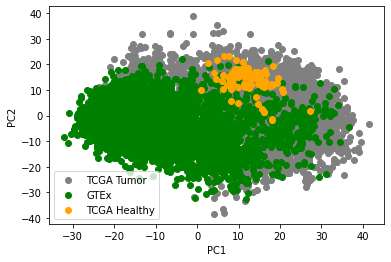

In [44]:
X = np.array(features)
y = [y[0] for y in Y]
set = ["GTEX" if "GTEX" in case_id else "TCGA" for case_id in patch_ids]

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

c=-1

colors = {'GTEX':'orange', 'TCGA':'green'}
df = pd.DataFrame(dict(X=X[:,0][:c], y=X[:,1][:c], set=set[:c], labels=y[:c]))

fig, ax = plt.subplots()

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

tumor_tcga = df.where((df["labels"]==0)&(df["set"]=="TCGA"))
ax.scatter(tumor_tcga["X"], tumor_tcga["y"], c="grey", label="TCGA Tumor")

gtex = df.where(df["set"]=="GTEX")
ax.scatter(gtex["X"], gtex["y"], c="green", label="GTEx")

healty_tcga = df.where((df["labels"]==1)&(df["set"]=="TCGA"))
ax.scatter(healty_tcga["X"], healty_tcga ["y"], c = "orange", label='TCGA Healthy')

ax.legend()

fig.show()

In [45]:
import umap



C:\Users\Alejandro\AppData\Local\Temp\ipykernel_740\2997934714.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


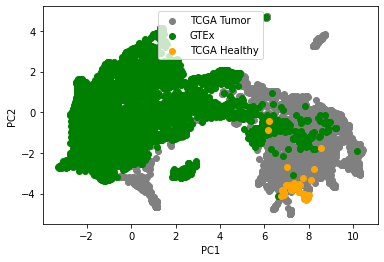

In [48]:
X = np.array(features)
y = [y[0] for y in Y]
set = ["GTEX" if "GTEX" in case_id else "TCGA" for case_id in patch_ids]

reducer = umap.UMAP(random_state=84)
embedding = reducer.fit_transform(X)

X_1 = reducer.embedding_[:, 0]
X_2 = reducer.embedding_[:, 1]

c=-1

colors = {'GTEX':'orange', 'TCGA':'green'}
df = pd.DataFrame(dict(X=X_1[:c], y=X_2[:c], set=set[:c], labels=y[:c]))

fig, ax = plt.subplots()

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

tumor_tcga = df.where((df["labels"]==0)&(df["set"]=="TCGA"))
ax.scatter(tumor_tcga["X"], tumor_tcga["y"], c="grey", label="TCGA Tumor")

gtex = df.where(df["set"]=="GTEX")
ax.scatter(gtex["X"], gtex["y"], c="green", label="GTEx")

healty_tcga = df.where((df["labels"]==1)&(df["set"]=="TCGA"))
ax.scatter(healty_tcga["X"], healty_tcga ["y"], c = "orange", label='TCGA Healthy')

ax.legend()

fig.show()

In [57]:
DATA_SET_NAME = "train_256_tcia_data_set_SPLIT"

In [58]:
# Choosing device for tensor processing

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Using GPU :", device)
else:
    device = torch.device("cpu")
    print("Using CPU ")

Using GPU : cuda:0


In [59]:
n_splits = 1
X, Y, patch_ids = [], [], []

for SPLIT in range(n_splits):
    if SPLIT == n_splits-1: # For the final split for validation we take the firs one for test
        SPLIT_NAME = DATA_SET_NAME + f"{0}"
    else:
        SPLIT_NAME = DATA_SET_NAME + f"{SPLIT+1}" # Test set

    print("Reading split: ", SPLIT_NAME)
    x, y, _ , case_id = data_reader.read_lmdb(f"D:\data\WSI\patches\{SPLIT_NAME}")

    X.extend(x)
    Y.extend(y)
    patch_ids.extend(case_id)


Reading split:  train_256_tcia_data_set_SPLIT0
Read lmdb
26772


In [62]:
net = torchvision.models.resnet18(pretrained=True).to(device)

MODEL_NAME = "256_tcia_25ep0"
net = torch.load(f"C:\\Users\\Alejandro\\Desktop\\heterogeneous-data\\results\\WSI\\models\\{MODEL_NAME}.pth") # Model loading
net.fc = nn.Sequential(nn.Identity(kernel_size=512))

In [63]:
features = []
for x in X:
    # NORMALIZATION
    x = torch.Tensor([x]).permute(0,3,2,1)
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    normalize = torchvision.transforms.Normalize(mean=mean, std=std)
    x = normalize(x/255)

    net.eval()
    with torch.no_grad():
        features.append(np.array(net(x.to(device))[0].cpu()))

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_740\3362055916.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


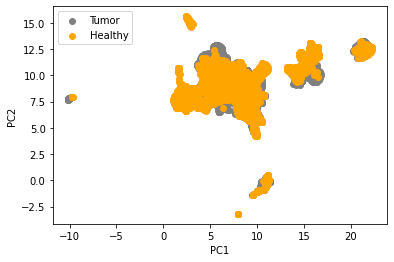

In [64]:
X = np.array(features)
y = [y[0] for y in Y]

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

X_1 = reducer.embedding_[:, 0]
X_2 = reducer.embedding_[:, 1]

c=-1
df = pd.DataFrame(dict(X=X_1[:c], y=X_2[:c], labels=y[:c]))

fig, ax = plt.subplots()

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

tumor_tcga = df.where((df["labels"]==0))
ax.scatter(tumor_tcga["X"], tumor_tcga["y"], c="grey", label="Tumor")

healty_tcga = df.where((df["labels"]==1))
ax.scatter(healty_tcga["X"], healty_tcga ["y"], c="orange", label='Healthy')

ax.legend()

fig.show()